# ML Basics, Warming up with small data

In [1]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np

Automatically created module for IPython interactive environment


### Read poll data

In [2]:
df = pd.read_csv(('./Data/MUSA-650WelcomePoll.csv'))
df.head()

,Timestamp,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?,Q4_General background in machine learning?,Q5_Hands-on experience in running machine learning applications?,Q6_Which one would you prefer on a Sunday afternoon?,Q7_Hands-on experience in image analysis using satellite images?,Q8_Level of interest in mathematics?,Q9_Level of interest in reading?,Q10_Level of stress about this class?,Q11_Your overall motivation about this class?
0,2020/01/14 5:11:10 PM EST,8,5,4,6,7,Running,5,3,5,7,3
1,2020/01/14 5:15:45 PM EST,8,8,5,5,6,Reading,7,7,6,7,8
2,2020/01/14 10:10:14 PM EST,6,6,6,6,5,Watching a movie,7,7,7,7,7
3,2020/01/15 10:02:48 AM EST,5,3,6,4,4,Watching a movie,3,8,8,5,10
4,2020/01/15 10:03:20 AM EST,6,6,5,4,3,Reading,4,5,4,10,8


### Calculate relative timestamp

In [3]:
df.Timestamp = pd.to_datetime(df.Timestamp, format='%Y/%m/%d %I:%M:%S %p EST')
df['tsRel'] = (df.Timestamp - df.Timestamp.min()).dt.total_seconds()
df[['Timestamp', 'tsRel']].head(10)

,Timestamp,tsRel
0,2020-01-14 17:11:10,0.0
1,2020-01-14 17:15:45,275.0
2,2020-01-14 22:10:14,17944.0
3,2020-01-15 10:02:48,60698.0
4,2020-01-15 10:03:20,60730.0
5,2020-01-15 10:03:43,60753.0
6,2020-01-15 10:03:50,60760.0
7,2020-01-15 10:03:53,60763.0
8,2020-01-15 10:03:59,60769.0
9,2020-01-15 10:04:03,60773.0


### Column names

In [4]:
df = df[df.columns[1:]]
initCol = df.columns.tolist()
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?',
 'tsRel']

In [5]:
df.columns = df.columns.str.split('_', 1).str[0].tolist()
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,tsRel
0,8,5,4,6,7,Running,5,3,5,7,3,0.0
1,8,8,5,5,6,Reading,7,7,6,7,8,275.0
2,6,6,6,6,5,Watching a movie,7,7,7,7,7,17944.0
3,5,3,6,4,4,Watching a movie,3,8,8,5,10,60698.0
4,6,6,5,4,3,Reading,4,5,4,10,8,60730.0


### Visualize correlations

In [6]:
#sns.pairplot(df, kind = 'reg')

In [7]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel
Q1,1.000000,0.766725,0.713877,0.624063,0.738857,0.676150,0.405270,-0.244388,-0.441883,0.042206,0.313668
Q2,0.766725,1.000000,0.639008,0.481836,0.568244,0.692275,0.399874,-0.321784,-0.329991,0.099348,0.383485
Q3,0.713877,0.639008,1.000000,0.564825,0.544057,0.616467,0.596732,-0.083087,-0.631657,0.400580,0.457261
Q4,0.624063,0.481836,0.564825,1.000000,0.945541,0.450752,0.426714,-0.461877,-0.168868,0.036739,0.440323
Q5,0.738857,0.568244,0.544057,0.945541,1.000000,0.444940,0.467669,-0.463201,-0.263556,-0.023930,0.407507
Q7,0.676150,0.692275,0.616467,0.450752,0.444940,1.000000,0.184545,-0.198770,-0.284418,0.045276,0.152171
Q8,0.405270,0.399874,0.596732,0.426714,0.467669,0.184545,1.000000,-0.126656,-0.205698,0.501068,0.036620
Q9,-0.244388,-0.321784,-0.083087,-0.461877,-0.463201,-0.198770,-0.126656,1.000000,-0.217410,0.228420,-0.193531
Q10,-0.441883,-0.329991,-0.631657,-0.168868,-0.263556,-0.284418,-0.205698,-0.217410,1.000000,-0.133846,-0.311850
Q11,0.042206,0.099348,0.400580,0.036739,-0.023930,0.045276,0.501068,0.228420,-0.133846,1.000000,0.430875


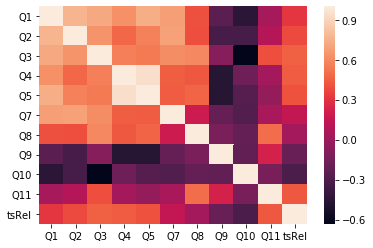

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [9]:
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?',
 'tsRel']

### Handling categorical variables (visualization)

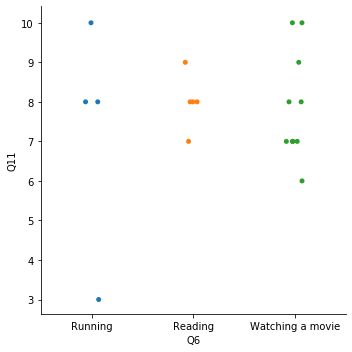

In [10]:
sns.catplot(x="Q6", y="Q11", data=df);

### Handling categorical variables (Data analysis)

In [11]:
df = pd.get_dummies(df, columns=['Q6'])

In [12]:
df

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,Q6_Reading,Q6_Running,Q6_Watching a movie
0,8,5,4,6,7,5,3,5,7,3,0.0,0,1,0
1,8,8,5,5,6,7,7,6,7,8,275.0,1,0,0
2,6,6,6,6,5,7,7,7,7,7,17944.0,0,0,1
3,5,3,6,4,4,3,8,8,5,10,60698.0,0,0,1
4,6,6,5,4,3,4,5,4,10,8,60730.0,1,0,0
5,8,7,8,3,3,8,4,10,2,8,60753.0,0,1,0
6,4,3,1,1,1,1,1,10,8,8,60760.0,1,0,0
7,7,3,7,6,5,4,6,8,6,9,60763.0,1,0,0
8,5,5,5,4,4,4,4,5,5,7,60769.0,0,0,1
9,6,6,6,6,6,4,6,6,5,6,60773.0,0,0,1


In [13]:
dfTmp = df[['Q8', 'Q9', 'Q10', 'Q11', 'Q6_Reading', 'Q6_Running', 'Q6_Watching a movie',]].copy()

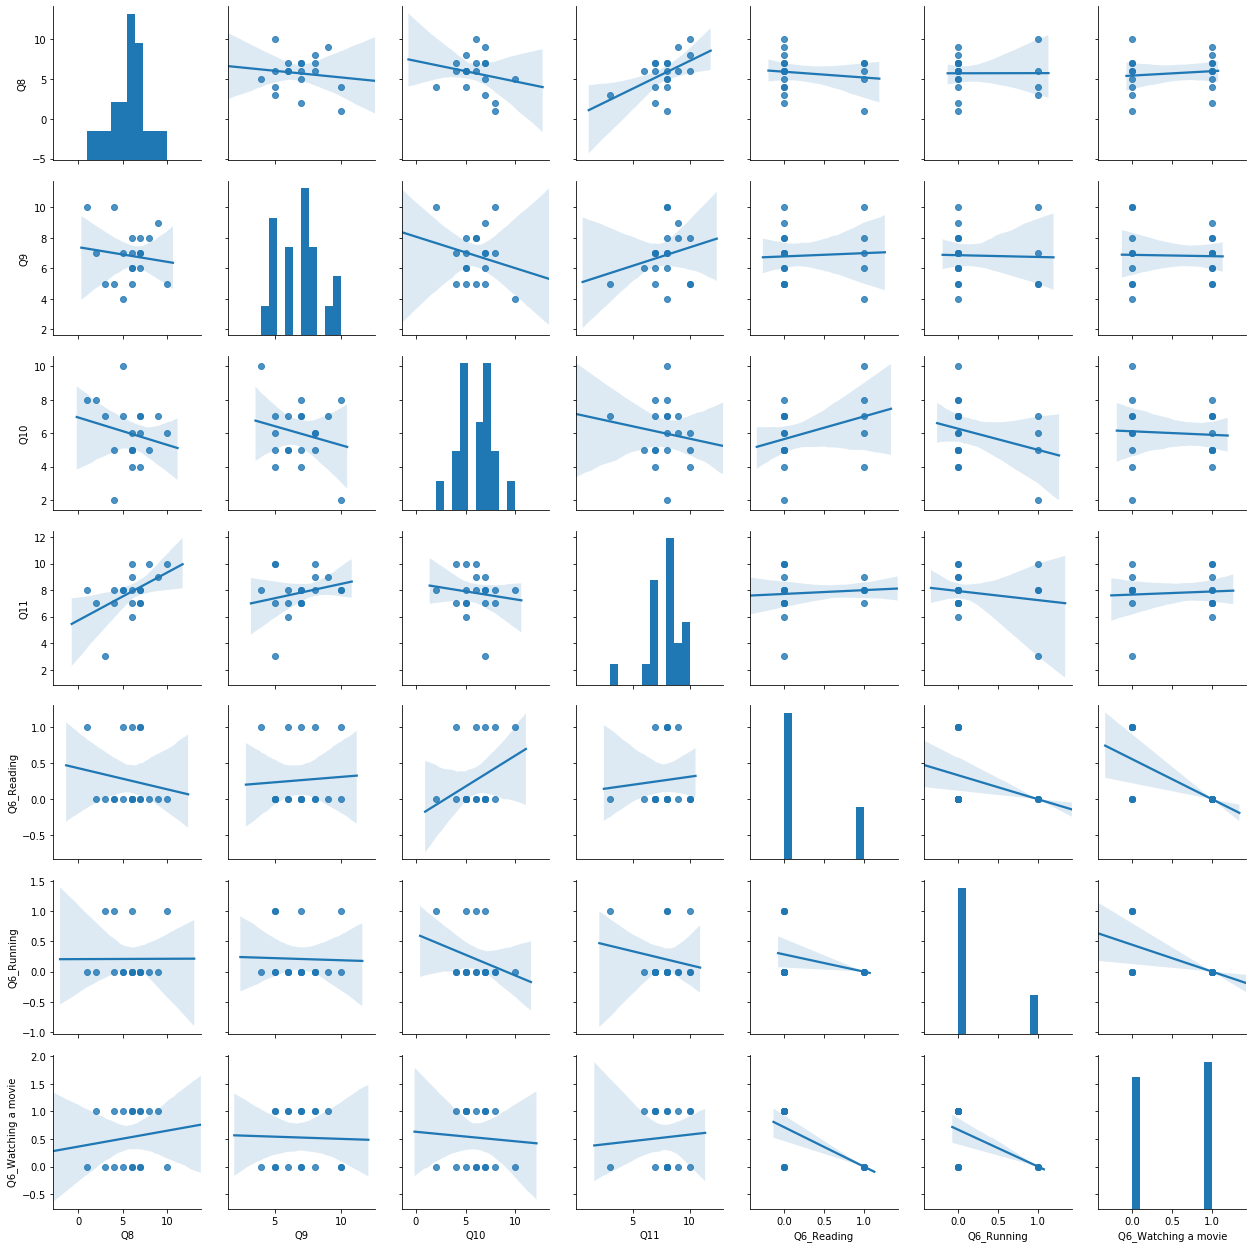

In [14]:
sns.pairplot(dfTmp, kind = 'reg')

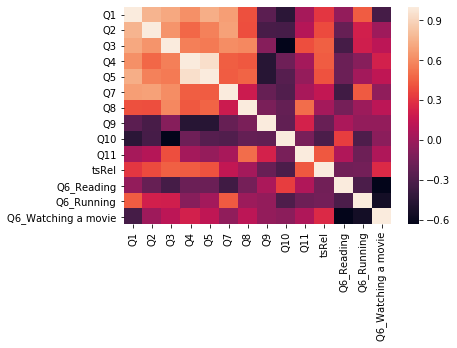

In [15]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Dimensionality reduction

In [22]:
mdlPCA = PCA(n_components=5)
XPCA = mdlPCA.fit_transform(df)

print(mdlPCA.explained_variance_)

[8.52698796e+09 1.54531344e+01 5.73109429e+00 5.04570099e+00
 2.81761507e+00]


In [23]:
print(mdlPCA.components_[0,:])

[ 5.23403869e-06  7.40036105e-06  8.97709992e-06  9.61319140e-06
  9.32793474e-06  3.94503126e-06  8.95009702e-07 -3.58017421e-06
 -6.06213801e-06  7.55257058e-06  1.00000000e+00 -7.70261980e-07
 -6.96515391e-07  1.46677737e-06]


### Question: What is "wrong" in the data?

In [25]:
df = df[df.columns[df.columns.str.contains('tsRel')==False]]

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q6_Reading', 'Q6_Running', 'Q6_Watching a movie'],
      dtype='object')

In [26]:
mdlPCA = PCA(n_components=5)
XPCA = mdlPCA.fit_transform(df)

print(mdlPCA.explained_variance_)

[18.37901473  5.74344063  5.04998967  2.8997888   1.72454955]


In [27]:
print(mdlPCA.components_[0,:])

[-0.31197397 -0.33351274 -0.35789207 -0.38437382 -0.42012851 -0.41185266
 -0.32498595  0.14589123  0.18768099 -0.0764527   0.03081644 -0.0220103
 -0.00880614]


### Predictive models